In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test, y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(x_train)

60000

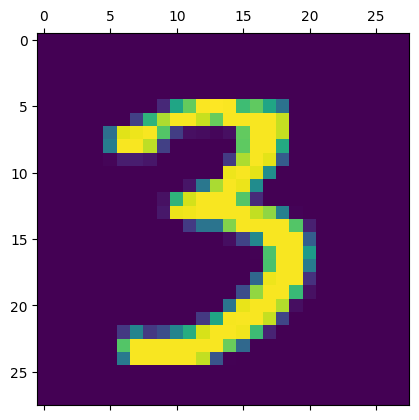

In [9]:
plt.matshow(x_train[10000])

In [16]:
x_train=x_train/255
x_test=x_test/255

In [17]:
x_train_flattend = x_train.reshape(len(x_train),28*28)
x_test_flattend = x_test.reshape(len(x_test),28*28)

In [18]:
x_test_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattend,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8221 - loss: 0.7020
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9139 - loss: 0.3095
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9188 - loss: 0.2883
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9245 - loss: 0.2723
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9266 - loss: 0.2672


In [20]:
model.evaluate(x_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9146 - loss: 0.3038


[0.2687723636627197, 0.9261999726295471]

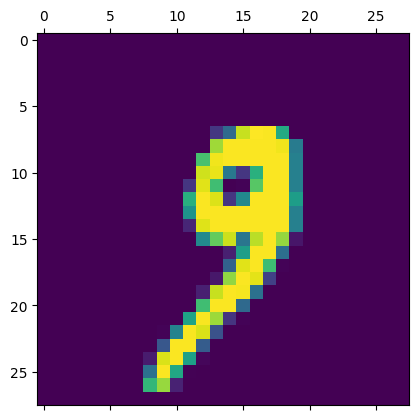

In [27]:
plt.matshow(x_test[1000])

In [22]:
y_predict = model.predict(x_test_flattend)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
y_predict[1000]

array([2.1205240e-05, 7.2138016e-03, 5.8252743e-04, 9.2473227e-01,
       1.7145798e-01, 7.7149034e-03, 4.3220057e-06, 9.2741954e-01,
       9.7764097e-02, 9.8154598e-01], dtype=float32)

In [28]:
np.argmax(y_predict[1000])

np.int64(9)

In [29]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [31]:
cm=  tf.math.confusion_matrix(y_test,y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    4,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  916,   19,   11,    5,   10,   10,   45,    2],
       [   2,    0,   14,  933,    1,   20,    2,    8,   25,    5],
       [   2,    1,    3,    1,  926,    0,    7,    3,   11,   28],
       [   7,    3,    4,   35,   10,  777,   11,    5,   34,    6],
       [  12,    3,    8,    1,    8,   18,  902,    2,    4,    0],
       [   1,    7,   19,   10,    9,    0,    0,  951,    5,   26],
       [   5,    6,    6,   21,    9,   22,    7,   11,  882,    5],
       [  10,    7,    1,   13,   36,    6,    0,   23,   11,  902]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

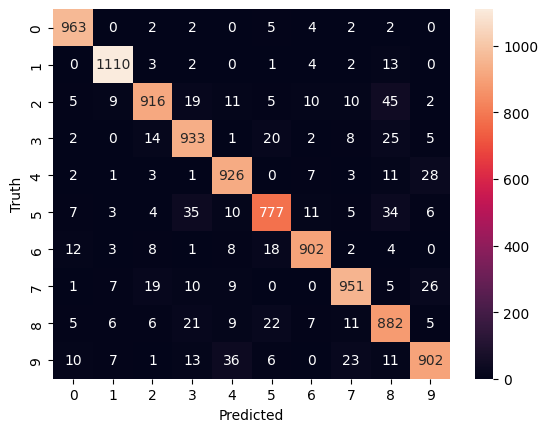

In [35]:
import seaborn as sn
#plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

adding hidden layer to improve the prediction

In [37]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattend,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8704 - loss: 0.4566
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9618 - loss: 0.1329
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9737 - loss: 0.0900
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9789 - loss: 0.0688
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9840 - loss: 0.0507


In [38]:
model.evaluate(x_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.0979


[0.08698203414678574, 0.9731000065803528]